In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
df1=pd.read_csv('/content/train.csv')
df2=pd.read_csv('/content/test.csv')
df = pd.concat([df1, df2], ignore_index=True)
print(df)

      PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

In [ ]:
print(df.duplicated().value_counts())

False    1309
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


<Axes: xlabel='Embarked', ylabel='Count'>

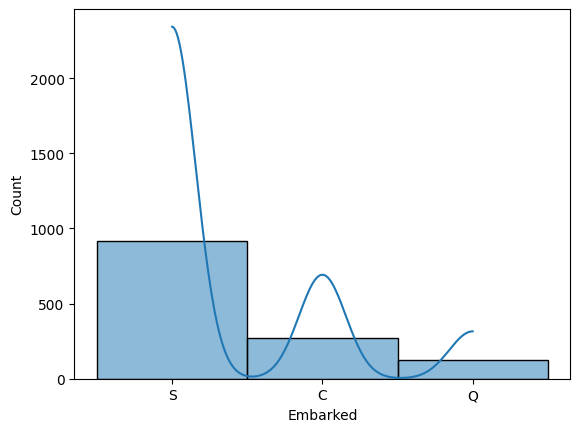

In [ ]:
sns.histplot(data=df,x='Embarked',kde=True)     #age:mean cabin,servival:mediun,
# Mean              Median           Mode
# age                survival,fare         cabin
#numerical:passid,pclass,sibsp,parch,fare,
#catorgical:name,sex,ticket,cabin,Embarked

In [ ]:
df['Survived']=df['Survived'].fillna(df['Survived'].median())

In [ ]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [ ]:
# Define feature groups
numerical_mean_features = ['Age']
numerical_median_features = ['Fare']
categorical_mode_features = [col for col in ['Cabin', 'Embarked'] if col in X.columns]
# categorical_mode_features = ['Cabin','Embarked']
# numerical_features = ['PassengerId','Pclass','SibSp','Parch','Fare']
# categorical_features = ['Name','Sex','Ticket','Cabin','Embarked']

# Imputer for numerical (mean)
numerical_mean_transformer = SimpleImputer(strategy='mean')
numerical_median_transformer= SimpleImputer(strategy='median')

# Imputer + Encoder for categorical (mode + OneHot)
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into column transformer
preprocessor = ColumnTransformer([
    ('num_mean', numerical_mean_transformer, numerical_mean_features),
    ('num_median', numerical_median_transformer, numerical_median_features),
    ('cat', categorical_transformer, categorical_mode_features)
])

model= Pipeline([
    ('preprocess',preprocessor),
    ('model',RandomForestClassifier())
])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_mean', SimpleImputer(),
                                                  ['Age']),
                                                 ('num_median',
                                                  SimpleImputer(strategy='median'),
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Cabin', 'Embarked'])])),
                ('model', RandomForestClassifier())])

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
acc_score=accuracy_score(y_test,y_pred)
print(f"The Accuarcy Score is : {acc_score}")

The Accuarcy Score is : 0.6870229007633588


In [ ]:
single_passenger = pd.DataFrame([{
    'PassengerId': 907,
    'Pclass': 2,
    'Name': 'del Carlo, Mrs. Sebastiano (Argenia Genovesi)',
    'Sex': 'female',
    'Age': 24,
    'SibSp': 1,
    'Parch': 0,
    'Ticket': 'SC/PARIS 2167',
    'Fare': 27.7208,
    'Cabin': None,
    'Embarked': 'C'
}])


predicted_survival = model.predict(single_passenger)


print("Predicted Survived:", predicted_survival[0])

Predicted Survived: 0.0
